## Table of Contents
1. Importing the packages
* Reading dataset from yahoo
* Exploring the data
* Importing more packages for prediction
* Train Test Split
* Building the model
* Prediction on ts_test
* Prediction with Test data

In [1]:
# Reading Data
import pandas_datareader as pdr

# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading the dataset 

In [2]:
# get_data_yahoo(inst_ticker, start_date, end_date)
df = pdr.get_data_yahoo('TSLA', '29-June-10','18-April-20',)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


We require ony 2 columns: Date and Close

In [3]:
df1=df['Close']  # new_df contains only the required columns
df2 = df1.sort_index(axis=0,ascending = False)
df3 = pd.DataFrame(df2,columns = ['Close'])
df3

,Close
Date,
2020-04-17,753.890015
2020-04-16,745.210022
2020-04-15,729.830017
2020-04-14,709.890015
2020-04-13,650.950012
...,...
2010-07-06,16.110001
2010-07-02,19.200001
2010-07-01,21.959999


In [4]:
stocks_df = df3[7:]     
Test_data = df3[:7]     #This has data for 7 days from 2020-04-17 to 2020-04-08
stocks_df.head()

,Close
Date,
2020-04-07,545.450012
2020-04-06,516.239990
2020-04-03,480.010010
2020-04-02,454.470001
2020-04-01,481.559998


3. Exploring the data

In [5]:
stocks_df.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2461 entries, 2020-04-07 to 2010-06-29
Data columns (total 1 columns):
Close    2461 non-null float64
dtypes: float64(1)
memory usage: 38.5 KB


In [6]:
stocks_df.tail()

,Close
Date,
2010-07-06,16.110001
2010-07-02,19.200001
2010-07-01,21.959999
2010-06-30,23.830000
2010-06-29,23.889999


Our data starts from 29th JUNE 2010 to 7th APRIL 2020

Plot the daily returns

D:\New folder\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


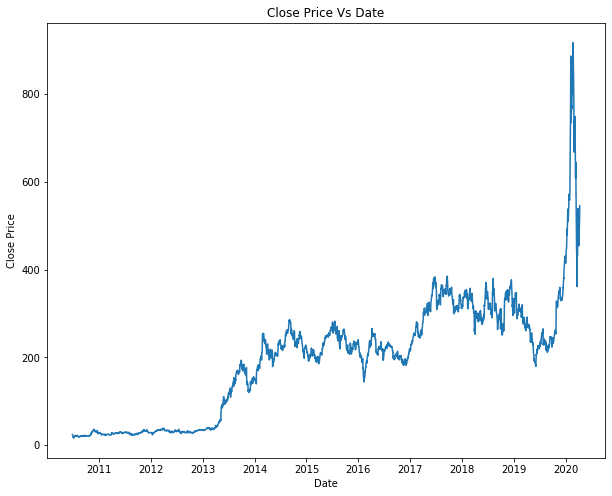

In [7]:
plt.figure(figsize=[10,8])                                   # Setting the figure size
plt.plot(stocks_df['Close'])                                 # Plotting the close price
plt.xlabel("Date")                                           # Setting the label in x-axis
plt.ylabel("Close Price")                                    # Setting the label in y-axis
plt.title("Close Price Vs Date")                             # Title
plt.show()

Calculate the percentage change

In [8]:
data_pc = df.Close.pct_change()
data_pc.head()

Date
2010-06-29         NaN
2010-06-30   -0.002511
2010-07-01   -0.078473
2010-07-02   -0.125683
2010-07-06   -0.160938
Name: Close, dtype: float64

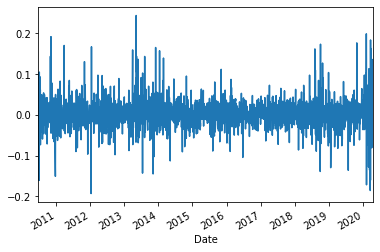

In [9]:
data_pc.plot()

under standing the perfomance of Tesla when 'WHO' declared 'Emergency' and 'Pandemic'

In [10]:
columns_1 = ['pandemic_name','first_case','who_emergency','pandemic_declaration','last_date']
ro_list = [['covid19',datetime.strptime('2019-11-17', '%Y-%m-%d'),datetime.strptime('2020-01-30', '%Y-%m-%d'),datetime.strptime('2020-03-11', '%Y-%m-%d'),datetime.strptime('2020-07-31', '%Y-%m-%d')]]
covid_timelines = pd.DataFrame(ro_list,columns = columns_1)  
covid_timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31


Ploting Tesla performance based on timelines 'Sector wise' and 'Index wise'

In [11]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()

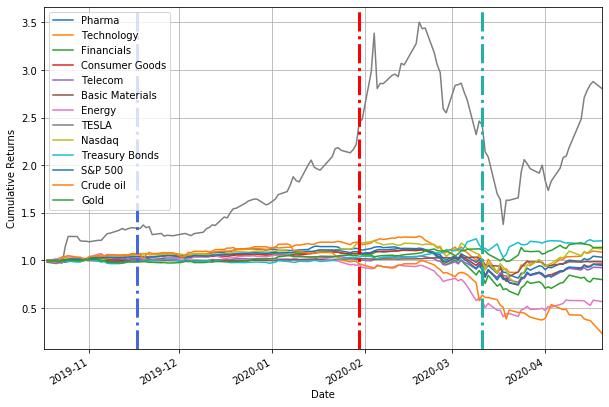

In [12]:
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE','TSLA','NDAQ','TLT','^GSPC', 'CL=F','GC=F']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy','TESLA','Nasdaq','Treasury Bonds','S&P 500','Crude oil','Gold']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Close']    
        except:
            pass
    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)


It can be concluded that TESLA out performed 'All Sectors' and 'All Indexes'

4. Importing more packages for prediction

In [13]:
from keras.models import Sequential                   # Sequential model
from keras.layers import Dense                        # For fully connected layers
from keras.layers import LSTM                         # For LSTM layers
from sklearn.preprocessing import MinMaxScaler        # Scaling the data
min_max_scaler = MinMaxScaler()

Using TensorFlow backend.


In [14]:
len(stocks_df)

2461

Checking for null values

In [15]:
stocks_df.isnull().sum()                                 # There are no null values in the dataframe

Close    0
dtype: int64

6. Train Test Split 
Lets make prediction for 30 days

In [16]:
prediction_days = 30
ts_train= stocks_df[prediction_days:]       # Remove 30 days from the end for Training data
ts_test= stocks_df[:prediction_days]        # Last 30 days values for test

In [17]:
ts_train.shape                                             # Checking the number of rows in train data

(2431, 1)

In [18]:
ts_test.shape                                              # Checking the number of rows in test data

(30, 1)

In [19]:
ts_test

,Close
Date,
2020-04-07,545.450012
2020-04-06,516.239990
2020-04-03,480.010010
2020-04-02,454.470001
2020-04-01,481.559998
2020-03-31,524.000000
2020-03-30,502.130005
2020-03-27,514.359985
2020-03-26,528.159973


In [20]:
# Scaling the train data

training_set=ts_train.values
training_set = min_max_scaler.fit_transform(training_set)

Defining our X and y
X is our inputs which is the training data.
y is the output, which is training data shifted by 1.

For a given day, we want to predict the stock value for the next day.

In [21]:
x_train=training_set[0:len(training_set)-1]
y_train=training_set[1:len(training_set)]

In [22]:
x_train[:5]                                                  # Checking the first 5 rows of the scaled training data

array([[0.86966792],
       [0.90724473],
       [0.98178836],
       [0.98002483],
       [1.        ]])

In [23]:
y_train[:5]                                                  # Checking the first 5 rows of the scaled test data

array([[0.90724473],
       [0.98178836],
       [0.98002483],
       [1.        ],
       [0.93454009]])

In [24]:
len(x_train)                                                 # We should have same number of records in x_train and y_train

2430

In [25]:
len(y_train)

2430

6.Building our model 

In [26]:
x_train = np.reshape(x_train, (len(x_train), 1, 1))          # We need to reshape the data before it is passed to the model

In [27]:
num_units = 32
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 50

In [28]:
# Training the data from 2010-06-29 to 2020-04-17 

regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/50
2430/2430 [==============================] - 3s 1ms/step - loss: 0.0166
Epoch 2/50
2430/2430 [==============================] - 1s 600us/step - loss: 0.0070
Epoch 3/50
2430/2430 [==============================] - 1s 593us/step - loss: 0.0016
Epoch 4/50
2430/2430 [==============================] - 1s 512us/step - loss: 2.0070e-04
Epoch 5/50
2430/2430 [==============================] - 1s 544us/step - loss: 9.0377e-05
Epoch 6/50
2430/2430 [==============================] - 1s 591us/step - loss: 8.9798e-05
Epoch 7/50
2430/2430 [==============================] - 2s 651us/step - loss: 9.2267e-05
Epoch 8/50
2430/2430 [==============================] - 1s 542us/step - loss: 9.6402e-05
Epoch 9/50
2430/2430 [==============================] - 1s 527us/step - loss: 9.8523e-05
Epoch 10/50
2430/2430 [==============================] - 1s 351us/step - loss: 9.9046e-05
Epoch 11/50
2430/2430 [==============================] - 1s 544us/step - loss: 1.0038e-04
Epoch 12/50
2430/2430 [==========

7. Prediction on ts_test ¶

In [29]:
# We are going to make prediction from 2020-02-26 to 2020-04-07

# Preprocess the test data

test_set = ts_test.values

inputs = np.reshape(test_set, (len(test_set), 1))                        # Reshape before passing in the input
inputs = min_max_scaler.transform(inputs)                                # Scaling the data
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)                              # Make predictions on the test data
predicted_price = min_max_scaler.inverse_transform(predicted_price)      # Inverse transform the predicted price

In [30]:
# This is the close price of stocks for 30 days
predicted_price          

array([[539.8715 ],
       [511.53455],
       [476.2407 ],
       [451.26898],
       [477.75378],
       [519.0732 ],
       [497.80783],
       [509.707  ],
       [523.1114 ],
       [533.8659 ],
       [500.60187],
       [431.48758],
       [424.85156],
       [424.9596 ],
       [359.52466],
       [427.47314],
       [442.06003],
       [541.0042 ],
       [554.47656],
       [625.285  ],
       [635.8831 ],
       [600.1673 ],
       [691.0851 ],
       [710.9402 ],
       [734.37335],
       [730.63477],
       [728.863  ],
       [657.4588 ],
       [667.91266],
       [761.74054]], dtype=float32)

In [31]:
error=predicted_price-test_set    # Calculate the error

In [32]:
# Lets have a look at the error values
error

array([[ -5.57849121],
       [ -4.70544434],
       [ -3.76931763],
       [ -3.20101929],
       [ -3.80621338],
       [ -4.92681885],
       [ -4.32217407],
       [ -4.65298462],
       [ -5.04858398],
       [ -5.38409424],
       [ -4.39813232],
       [ -2.8024292 ],
       [ -2.67843628],
       [ -2.68041992],
       [ -1.69534302],
       [ -2.72686768],
       [ -3.00997925],
       [ -5.61578369],
       [ -6.07342529],
       [ -8.94500732],
       [ -9.44689941],
       [ -7.83270264],
       [-12.39489746],
       [-13.59979248],
       [-15.12664795],
       [-14.87524414],
       [-14.75701904],
       [-10.53118896],
       [-11.08734131],
       [-17.05944824]])

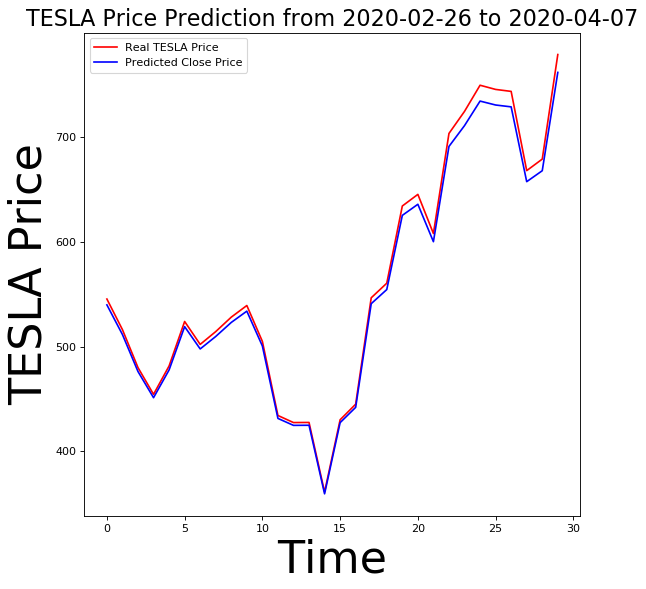

In [33]:
# Plot the Actual price and the predicted price

plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real TESLA Price')                      # Actual Price
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted Close Price')      # Predicted Price

plt.title('TESLA Price Prediction from 2020-02-26 to 2020-04-07', fontsize = 20)
plt.xlabel('Time', fontsize=40)
plt.ylabel('TESLA Price', fontsize = 40)
plt.legend(loc = 'best')
plt.show()

8. Prediction with test data 

In [34]:
Test_data
test_data1 = Test_data.iloc[:,0]
test_data1

Date
2020-04-17    753.890015
2020-04-16    745.210022
2020-04-15    729.830017
2020-04-14    709.890015
2020-04-13    650.950012
2020-04-09    573.000000
2020-04-08    548.840027
Name: Close, dtype: float64

We need to perform feature engineering on the test price before we can make predictions from the model

In [35]:
test_data1=np.array(test_data1)

In [36]:
test_data1 =test_data1.reshape(-1,1)                               # Reshape the data before you feed into the model

In [37]:
test_input=min_max_scaler.transform(test_data1)                    # Scale the data

In [38]:
test_input.shape

(7, 1)

In [39]:
test_input=np.reshape(test_input, (len(test_input), 1, 1))

In [40]:
test_prediction=regressor.predict(test_input)                          # Make predictions for the test data

In [41]:
test_prediction=min_max_scaler.inverse_transform(test_prediction)      # Inverse transform the predictions

In [42]:
test_prediction

array([[738.48364],
       [730.35364],
       [715.9157 ],
       [697.13635],
       [641.2417 ],
       [566.4954 ],
       [543.1532 ]], dtype=float32)

In [43]:
Test_data.iloc[:,0]

Date
2020-04-17    753.890015
2020-04-16    745.210022
2020-04-15    729.830017
2020-04-14    709.890015
2020-04-13    650.950012
2020-04-09    573.000000
2020-04-08    548.840027
Name: Close, dtype: float64